Inspired by "Transformers and LLMs" CM295 2025 (Stanford Univ.)

Natural language processing (NLP) tasks can be grouped into three categories (quite common categories):

- Text classification (single-label): The model takes text and predicts one category or label. E.g., sentiment analysis; intent, language or spam detection.
- Token classification: The model takes text and assigns a category or label to each token (words or subwords). E.g., named entity recognition (NER) (tagging person names, locations, dates); part-of-speech (POS) tagging.
- Text generation: The model takes text and generates new text. E.g., machine translation; summarization; question answering (QA).

Let us take a closer look at an example for each of the three categories i.e., sentiment analysis, named entity recognition (NER) and machine translation.

As an example for sentiment analysis (text classification):

Predict if the sentence "My iPhone is quite cool!." has a positive or negative sentiment. For this, we could use e.g., the DistilBERT base model fine-tuned on SST-2. DistilBERT is a variant of BERT, pretrained to predict intentionally hidden tokens and fine-tuned on a dataset (SST-2) which contains 67k movie review sentences annotated as positive or negative.

Let's code this.

In [81]:
from transformers import pipeline

MODEL_NAME = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"


def main() -> None:
    classifier = pipeline(
        task="text-classification",
        model=MODEL_NAME,
        framework="pt",
    )

    text = "My iPhone is quite cool!."
    result = classifier(text)[
        0
    ]  # pipeline returns a list of dictionaries (one per input)

    label = result["label"]
    softmax_prob = result["score"]

    print(f"Label: {label}")
    print(f"Softmax probability: {softmax_prob:.6f}")  # .6f for readability


if __name__ == "__main__":
    main()


Device set to use mps:0


Label: POSITIVE
Softmax probability: 0.999837


Perfect!. The above model successfully assigned a positive (and correct) sentiment to the sentence "My iPhone is quite cool!." with a probability (or certainty) of 0.999837. 

To measure or evaluate such models (either "during" or "post" training), we could leverage evaluation metrics. There are multiple evaluation metrics used on validation sets ("during" training) or test sets ("post" training). On validation sets (also called held-out sets) to evaluate performance and determine which checkpoint to store. On post-training on a separate test set to provide final performance and reporting. 

Common evaluation metrics are (as you potentially know) e.g., accuracy, precision, recall and F1-score. Each of these metrics uses variables such as TP, FP, FN, and TN, which are counts obtained by comparing the model's predictions with the actual (true) labels. To make this clear:

- TP stands for true positives i.e., the model predicted positive, and the label was positive
- TN stands for true negative i.e., the model predicted negative, and the label was negative
- FP stands for false positive i.e., the model predicted positive, but the label was negative
- FN stands for false negative i.e., the model predicted negative, but the label was positive

You can represent the above variables in a so called confusion matrix (basically just a table summarizing how a model's predictions compare to the actual (true) labels. For the sake of completeness, it looks like this:

\begin{array}{c|c|c}
    & \text{Predicted positive} & \text{Predicted negative} \\
\hline
\text{Actual positive} & TP & FN \\
\text{Actual negative} & FP & TN \\
\end{array}

Now, lets take a closer look on evaluation metrics and how to form them.

Accuracy (A) measures, of all the sentences predicted (whether positive or negative), how many predictions were correct. If we think about this without knowing the formula, for "all the sentences" we would select "TP + TN + FP + FN" (basically all...) and for "how many predictions were correct" we would select the correct predictions "TP + TN". Therefore,
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} \text{, where } A \in [0, 1]
$$

Precision (P) measures, of all the sentences predicted as positive, how many were truly positive. If we think about this without knowing the formula, for "predicted as positive" we would select "TP+FP" and for "were truly positive" we would select "TP". Therefore,
$$
\text{Precision} = \frac{TP}{TP + FP} \text{, where } P \in [0, 1]
$$

Recall (R) measures, of all the sentences that are actually positive, how many were correctly identified as positive. For "all sentences that are actually positive" we would select "TP+FN" and for the subset "correctly identified as positive" we would select "TP". Therefore,
$$
\text{Recall} = \frac{TP}{TP + FN} \text{, where } R \in [0, 1]
$$

Quite simple isn't it. If we continue thinking, we would also figure out that accuracy is appropriate when the dataset is balanced i.e., FPs and FNs have similar consequences. E.g., if we assume a dataset where 99% of examples are labeled as "true" and 1% of examples are labeled as "false", then a rule-based model which only predicts "true" would achieve an accuracy of 0.99. This is extremely misleading and the reason why we require other evaluation metrics beside accuracy. If we take a look at the formula for precision, it is clear that it penalizes FPs (increasing FP is decreasing precision, because FP is a variable in the denominator) Therefore, it is a preferable metric if incorrect positive predictions are costly. On the other hand, recall penalizes FNs (increasing FN is decreasing recall). Therefore, it is a preferable metric when incorrect negative predictions are costly.

There is one more evaluation metric we are going to take a look at, the F1-score.

F1-score provides a measure when we are interested in both high precision (P) and high recall (R) (at the same time). Mathematically, we use the so-called harmonic mean defined as $H = (2ab) / (a + b)$ to satisfy this requirement. $H$ is a function that decreases sharply when either of its inputs is small, ensuring that the resulting value is high only when both precision and recall are high. Therefore,
$$
F1 = \frac{2PR}{P + R} = \frac{2TP}{2TP + FP + FN} \text{, where } F1 \in [0, 1]
$$

To visualise a function with such properties, we use a a so-called heatmap.

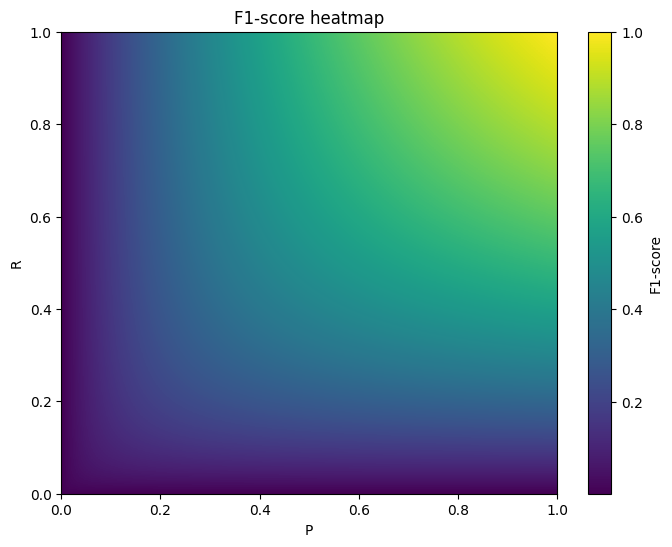

In [82]:
import numpy as np
import matplotlib.pyplot as plt


def compute_f1_grid(n: int = 200, eps: float = 1e-3) -> np.ndarray:
    p = np.linspace(eps, 1.0, n)
    r = np.linspace(eps, 1.0, n)
    pre, re = np.meshgrid(p, r)
    f1 = 2 * pre * re / (pre + re)
    return f1


def plot_f1_heatmap(f1_score: np.ndarray) -> None:
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(f1_score, origin="lower", extent=(0, 1, 0, 1), aspect="auto")
    plt.xlabel("P")
    plt.ylabel("R")
    plt.title("F1-score heatmap")
    plt.colorbar(label="F1-score")
    plt.show()


def main() -> None:
    f1_score = compute_f1_grid()
    plot_f1_heatmap(f1_score)


if __name__ == "__main__":
    main()


Perfect!. Move on.